## Observations and Insights 

1) The correlation coefficient between the mouse weight and average tumor volume for the Capomulin regimen is 0.84. This suggests that there is a positive relationship between two continuos variables, mouse weight and the average tumor volume for the Capomulin regimen.We can conclude that when the mouse weight increases, the average tumor volume tends to increase as well.

2) By selecting a mouse that was treated with Capomulin as a sample of the population, we can observe from the line plot that the tumor volume of mouse s185 decreases as the time point moves from 0 to 40. We can conclude that Capomulin regimen helps in reducing tumor volume in mice.

3) From the boxplot that we have generated below, we can observe that the mean of the final volume of the tumor from Ramicane is the lowest as compared to the others, followed by Capomulin. We can conclude that Ramicane and Capomulin are comparitively better treatements in reducing tumour size among the four promising regimens.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.shape

# Combine the data into a single dataset
combined_df=mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
no_of_mice=len(combined_df['Mouse ID'].unique())
no_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID=combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False),['Mouse ID','Timepoint']]
duplicate_mice_ID

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_combined_df = combined_df[combined_df['Mouse ID'] != 'g989']
updated_combined_df.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
updated_no_of_mice=len(updated_combined_df['Mouse ID'].unique())
updated_no_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#regimen_df=updated_combined_df.groupby('Drug Regimen')

summary_df = updated_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_df= summary_df[['mean','std']]
summary_df['var'] =  updated_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_df['median'] =  updated_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()  
summary_df['sem'] =  updated_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()    
summary_df                                                

,mean,std,var,median,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.320930,6.622085,43.852013,50.446266,0.544332
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_agg_df = updated_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
updated_regimen_df=updated_combined_df.groupby('Drug Regimen').nunique()
updated_regimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,24,2,14,6,10,125,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


<AxesSubplot:title={'center':'Total Number of Mice per Regimen'}, xlabel='Regimen', ylabel='Total Number of Mice'>

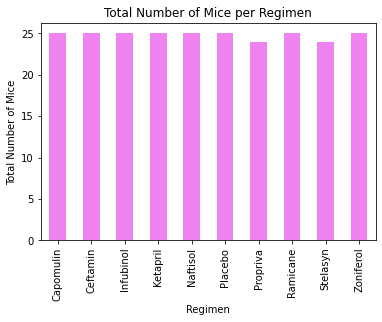

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_of_mice=updated_regimen_df['Mouse ID']
no_of_mice

no_of_mice.plot(kind='bar', color='violet', title='Total Number of Mice per Regimen', ylabel='Total Number of Mice',xlabel='Regimen')

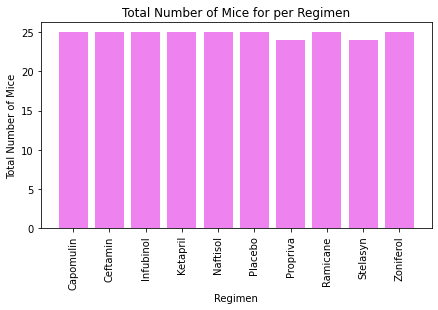

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(no_of_mice))
tick_locations = [x for x in x_axis]

plt.bar(x_axis, no_of_mice, color='violet', alpha=1, align="center")
plt.xticks(tick_locations, updated_regimen_df.index, rotation="vertical")
plt.tight_layout()

plt.title("Total Number of Mice for per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Number of Mice")
plt.show()

(-1.153469985700389,
 1.1095663517660537,
 -1.1565438196275293,
 1.1104756234118156)

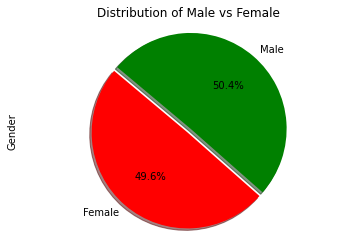

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=updated_combined_df.groupby('Sex').nunique()
gender_df=gender_df['Mouse ID']
gender_df

colors = ["red","green"]
explode = (0.05,0)

# Create a pie chart based upon the trip duration of that single bike
gender_pie = gender_df.plot(kind="pie", y='Gender', title=('Distribution of Male vs Female'),shadow=True,autopct="%1.1f%%",explode=explode,colors=colors,startangle=140)
gender_pie.set_ylabel("Gender")

plt.axis("equal")

(-1.153469985700389,
 1.1095663517660537,
 -1.1565438196275293,
 1.1104756234118156)

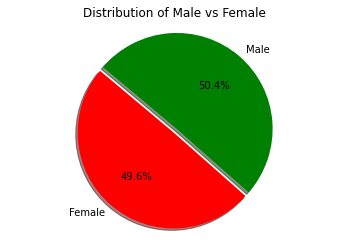

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
colors = ["red","green"]
explode = (0.05,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_df, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution of Male vs Female')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df=updated_combined_df.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, False]).drop_duplicates(['Mouse ID']).reset_index(drop=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
updated_timepoint_df=timepoint_df.loc[(timepoint_df['Drug Regimen']=='Capomulin')|(timepoint_df['Drug Regimen']=='Ramicane')|(timepoint_df['Drug Regimen']=='Infubinol')|(timepoint_df['Drug Regimen']=='Ceftamin')]
updated_timepoint_df=updated_timepoint_df.reset_index()
updated_timepoint_df.head(31)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,a203,Infubinol,Female,20,23,45,67.973419,2
1,1,a251,Infubinol,Female,21,25,45,65.525743,1
2,3,a275,Ceftamin,Female,20,28,45,62.999356,3
3,6,a411,Ramicane,Male,3,22,45,38.407618,1
4,7,a444,Ramicane,Female,10,25,45,43.047543,0
5,10,a520,Ramicane,Male,13,21,45,38.810366,1
6,11,a577,Infubinol,Female,6,25,30,57.031862,2
7,12,a644,Ramicane,Female,7,17,45,32.978522,1
8,13,a685,Infubinol,Male,8,30,45,66.083066,3
9,19,b128,Capomulin,Female,9,22,45,38.982878,2


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
for treatment in treatment:
    print(f"{treatment}:")
    tumor_vol= updated_timepoint_df.loc[updated_timepoint_df["Drug Regimen"] == treatment,'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of final tumor volume is: {lowerq}")
    print(f"The upper quartile of final tumor volume is: {upperq}")
    print(f"The interquartile range of final tumor volume is: {iqr}")
    print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"{treatment}'s outliers: {outliers}")
    print("----------------------------------------------------------\n")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outlier=updated_timepoint_df.iloc[15]
outlier

Capomulin:
The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------

Ramicane:
The lower quartile of final tumor volume is: 31.56046955
The upper quartile of final tumor volume is: 40.65900627
The interquartile range of final tumor volume is: 9.098536719999998
The the median of final tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------

Infubinol:
The lower quartile of final tumor volume

index                        31
Mouse ID                   c326
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Timepoint                     5
Tumor Volume (mm3)    36.321346
Metastatic Sites              0
Name: 15, dtype: object

Text(0, 0.5, 'Final Tumor Volume (mm3)')

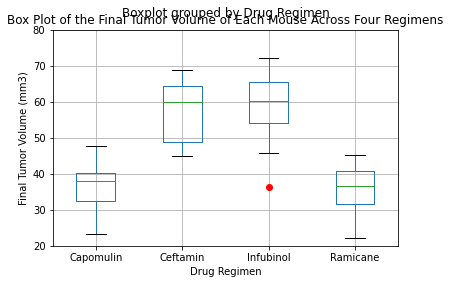

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot=updated_timepoint_df.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'],sym = "r")
boxplot.set_ylim(20,80)

plt.title("Box Plot of the Final Tumor Volume of Each Mouse Across Four Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [17]:
capumolin_df=combined_df.loc[combined_df['Drug Regimen']=='Capomulin']

capumolin_df=capumolin_df[['Timepoint','Tumor Volume (mm3)']]
                        
capumolin_df=capumolin_df[0:10]
capumolin_df = capumolin_df.set_index("Timepoint")
capumolin_df

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


Text(0, 0.5, 'Tumor Volume (mm3)')

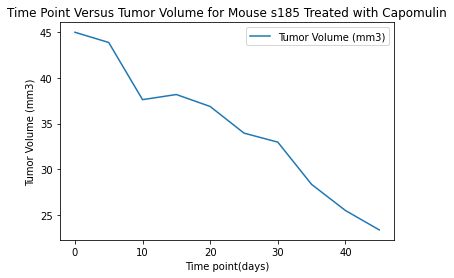

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capumolin_df.plot.line()

plt.title("Time Point Versus Tumor Volume for Mouse s185 Treated with Capomulin")
plt.xlabel("Time point(days)")
plt.ylabel("Tumor Volume (mm3)")

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capumolin_df=combined_df.loc[combined_df['Drug Regimen']=='Capomulin']
capumolin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0, 0.5, 'Average Tumor Volume(mm3)')

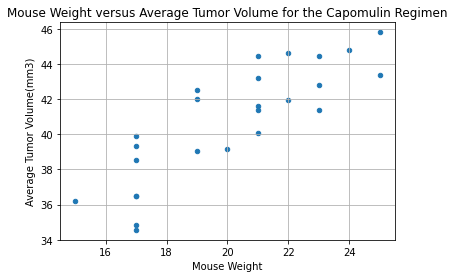

In [20]:
capumolin_by_weight_df = capumolin_df.groupby('Mouse ID').mean().reset_index()

capumolin_by_weight_df.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',grid=True)

plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume(mm3)")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient=st.pearsonr(capumolin_by_weight_df['Weight (g)'],capumolin_by_weight_df['Tumor Volume (mm3)'])
correlation_coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation_coefficient[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The r-squared is: 0.7088568047708717


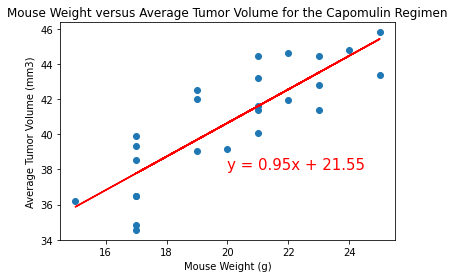

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(capumolin_by_weight_df['Weight (g)'], capumolin_by_weight_df['Tumor Volume (mm3)'])
regress_values = capumolin_by_weight_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capumolin_by_weight_df['Weight (g)'], capumolin_by_weight_df['Tumor Volume (mm3)'])
plt.plot(capumolin_by_weight_df['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()